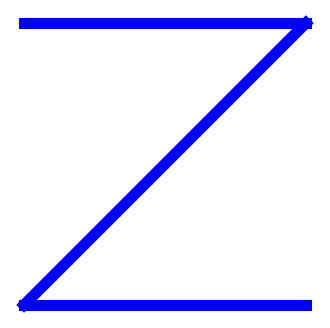

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Читаем файл
raw_csv = pd.read_csv('kaggle_input.csv')

# Удаление строк без целевой переменной
hrc = 'Final hardness (HRC) - post tempering'
csv = raw_csv.dropna(subset=[hrc])

# Заполнение пропусков медианами
names = ['Tempering temperature (ºC)', 'Tempering time (s)', 
            'C (%wt)', 'Mn (%wt)', 'Si (%wt)', 'Ni (%wt)', 'Cr (%wt)', 'Mo (%wt)']
csv[names] = csv[names].fillna(csv[names].median())

# делим данные на тестовые(на чем учим) и тренировочные(данные для которых учим)
X_data, X_test, y_data, y_test = train_test_split(csv[names], csv[hrc], test_size=0.2, random_state=104)

# выравниваем данные
scaler = StandardScaler()
X_data_scaled, X_test_scaled = scaler.fit_transform(X_data), scaler.transform(X_test)

plt.figure(figsize=(4, 4))
plt.plot([0, 1], [1, 1], 'b-', linewidth=8)  
plt.plot([1, 0], [1, 0], 'b-', linewidth=8)
plt.plot([0, 1], [0, 0], 'b-', linewidth=8)
plt.axis('equal')
plt.axis('off')
plt.show()

In [20]:
# простая линейная регрессия
linear_regression_model = LinearRegression().fit(X_data_scaled, y_data)

linear_regression_predict_data, linear_regression_predict_test = linear_regression_model.predict(X_data_scaled), linear_regression_model.predict(X_test_scaled) # предсказания данных

linear_regression_data_R2, linear_regression_test_R2 = r2_score(y_data, linear_regression_predict_data) , r2_score(y_test, linear_regression_predict_test)
linear_regression_data_sqrt, linear_regression_test_sqrt = np.sqrt(mean_squared_error(y_data, linear_regression_predict_data)) , np.sqrt(mean_squared_error(y_test, linear_regression_predict_test))

print(f"Коэффициент детерминации для регрессии {linear_regression_data_R2:.6f} {linear_regression_test_R2:.6f}")
print(f"Среднеквадратичная ошибка для регрессии {linear_regression_data_sqrt:.6f} {linear_regression_test_sqrt:.6f}")

Коэффициент детерминации для регрессии 0.879718 0.889474
Среднеквадратичная ошибка для регрессии 4.844323 4.817645


In [21]:
# нейронная
n_network = MLPRegressor(
    hidden_layer_sizes=(64, 32),  
    activation='relu',           
    solver='adam',                
    max_iter=100000,                 
    random_state=104
)
n_network.fit(X_data_scaled, y_data)

n_network_predict_data, n_network_predict_test = n_network.predict(X_data_scaled),  n_network.predict(X_test_scaled)

n_network_data_R2, n_network_test_R2 = r2_score(y_data, n_network_predict_data), r2_score(y_test, n_network_predict_test)
n_network_data_sqrt, n_network_test_sqrt = np.sqrt(mean_squared_error(y_data, n_network_predict_data)), np.sqrt(mean_squared_error(y_test, n_network_predict_test))

print(f"Коэффициент детерминации для нейронной сети {n_network_data_R2:.6f} {n_network_test_R2:.6f}")
print(f"Среднеквадратичная ошибка для нейронной сети {n_network_data_sqrt:.6f} {n_network_test_sqrt:.6f}")

Коэффициент детерминации для нейронной сети 0.980688 0.973266
Среднеквадратичная ошибка для нейронной сети 1.941090 2.369369


In [22]:
linear_regression_name = 'Линейная регрессия'
n_netowrk_name = 'Нейронная сеть'

comparison_df = pd.DataFrame({
    'Модель': [linear_regression_name, n_netowrk_name],
    'Коэффициенты детерминации регрессии и нейронной сети': [r2_score(y_data, linear_regression_predict_data),  r2_score(y_data, n_network_predict_data)],
    'Среднеквадратичная ошибка регрессии и нейронной сети': [np.sqrt(mean_squared_error(y_data, linear_regression_predict_data)), np.sqrt(mean_squared_error(y_data, n_network_predict_data))],
})
print(f"Описание: {comparison_df.to_markdown} ")

Описание: <bound method DataFrame.to_markdown of                Модель  Коэффициенты детерминации регрессии и нейронной сети  \
0  Линейная регрессия                                           0.879718      
1      Нейронная сеть                                           0.980688      

   Среднеквадратичная ошибка регрессии и нейронной сети  
0                                           4.844323     
1                                           1.941090     > 


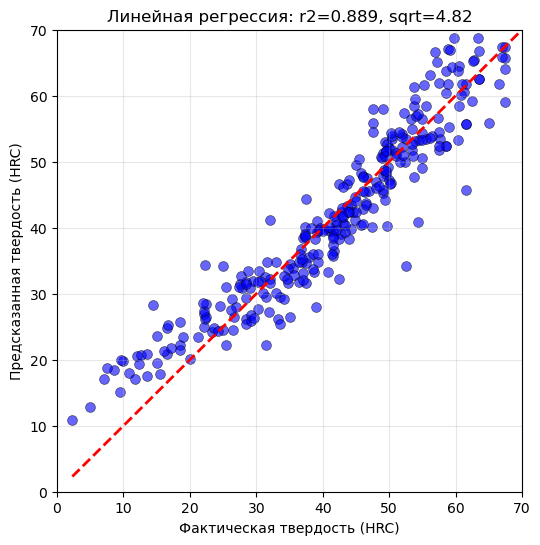

In [23]:
x_label = 'Фактическая твердость (HRC)'
y_label ='Предсказанная твердость (HRC)'

plt.figure(figsize=(6, 6))

min_val, max_val = min(y_test.min(), linear_regression_predict_test.min()), max(y_test.max(), linear_regression_predict_test.max())
line = np.linspace(min_val, max_val, 100)

plt.plot(line, line, 'r--', lw=2)
plt.scatter(y_test, linear_regression_predict_test, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{linear_regression_name}: r2={linear_regression_test_R2:.3f}, sqrt={linear_regression_test_sqrt:.2f}')

maxlim = 70
plt.xlim(0, maxlim)
plt.ylim(0, maxlim)
plt.grid(True, alpha=0.3)
plt.show()

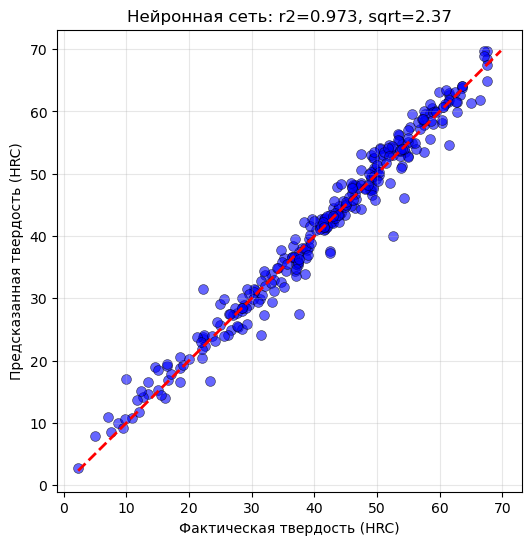

In [24]:
plt.figure(figsize=(6, 6))

min_val, max_val = min(y_test.min(), n_network_predict_test.min()), max(y_test.max(), n_network_predict_test.max())
line = np.linspace(min_val, max_val, 100)

plt.plot(line, line, 'r--', lw=2)
plt.scatter(y_test, n_network_predict_test, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{n_netowrk_name}: r2={n_network_test_R2:.3f}, sqrt={n_network_test_sqrt:.2f}')

plt.grid(True, alpha=0.3)
plt.show()

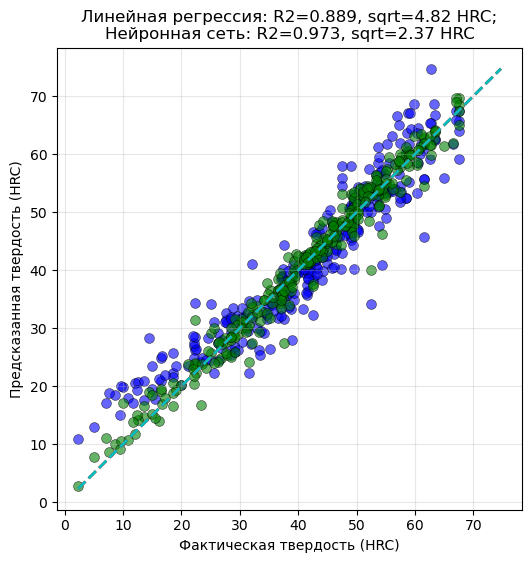

In [25]:
plt.figure(figsize=(6, 6))

min_val = min(y_test.min(), linear_regression_predict_test.min(), n_network_predict_test.min())
max_val = max(y_test.max(), linear_regression_predict_test.max(), n_network_predict_test.max())
line = np.linspace(min_val, max_val, 100)


plt.plot(line, line, 'r--', lw=2)
plt.plot(line, line, 'c--', lw=2)

plt.scatter(y_test, linear_regression_predict_test, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='blue')
plt.scatter(y_test, n_network_predict_test, alpha=0.6, s=50, edgecolor='black', linewidth=0.5, color='green')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{linear_regression_name}: R2={linear_regression_test_R2:.3f}, sqrt={linear_regression_test_sqrt:.2f} HRC;\n' \
        f'{n_netowrk_name}: R2={n_network_test_R2:.3f}, sqrt={n_network_test_sqrt:.2f} HRC')

plt.grid(True, alpha=0.3)
plt.show()